In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import RegexpTokenizer
import numpy as np
import re

In [4]:
df = pd.read_csv('archive/Train.csv')
df.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics',
       'Statistics', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

In [6]:
## Select noun from the corpus
whitespace_tokenizer = RegexpTokenizer("[a-zA-Z]+")
corpus = []
for text in df['ABSTRACT']:
    corpus.append(' '.join(whitespace_tokenizer.tokenize(text)))
corpus2 = []
for text in corpus:
    corpus2.append(' '.join([word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(text)) if(pos[:2] == 'NN')]))
print('length of documents: %s'%len(corpus2))
print('The aggregated length:',sum([len(d.split(' ')) for d in corpus2]))

length of documents: 14004
The aggregated length: 748473


In [7]:
minval = 5; maxval = 0.55
tv = TfidfVectorizer(stop_words='english', ngram_range=(1,3), min_df = minval, max_df=maxval)
doc_word_td = tv.fit_transform(corpus2)
doc_word2_td = pd.DataFrame(doc_word_td.toarray(), index=corpus2, columns=tv.get_feature_names())
print(doc_word2_td.shape)

(14004, 21479)


/Users/suzimu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    topic_vec = []
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        topic_vec.append(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topic_vec

In [9]:
num_axis = 15
nmf_model = NMF(num_axis)
doc_topic = nmf_model.fit_transform(doc_word_td)
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ['component_'+str(text) for text in (np.arange(num_axis) + 1)],
             columns = tv.get_feature_names())
# print(topic_word)
topic_vec = display_topics(nmf_model, tv.get_feature_names(), 10)

/Users/suzimu/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic  0
learning, classification, task, tasks, word, features, machine, art, state art, state

Topic  1
phase, spin, temperature, field, transition, state, energy, quantum, states, order

Topic  2
problem, algorithm, optimization, problems, algorithms, convergence, convex, solution, complexity, functions

Topic  3
galaxies, mass, star, gas, formation, galaxy, stars, emission, observations, cluster

Topic  4
network, networks, nodes, layer, layers, architecture, structure, training, node, networks networks

Topic  5
control, systems, controller, design, power, dynamics, feedback, stability, paper, controllers

Topic  6
mathbb, group, space, solutions, equation, equations, curvature, manifolds, case, groups

Topic  7
model, models, parameters, inference, model model, prediction, model parameters, predictions, model selection, selection

Topic  8
method, idea, idea method, methods, help, approaches, paper idea, paper idea method, novel, novel idea method

Topic  9
data, analysis, help, 

/Users/suzimu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/suzimu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
W = pd.DataFrame(doc_topic.round(5),
             index = corpus2,
             columns = [str(text) for text in (np.arange(num_axis) + 1)])
W = W.reset_index().drop(columns='index')
W

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.00000,0.00185,0.00000,0.01851,0.00157,0.00214,0.00531,0.00000,0.00121,0.07486,0.00428,0.05374,0.00280,0.00338,0.00000
1,0.00000,0.00000,0.10672,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02711,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.06840,0.00000,0.00000,0.00000,0.01342,0.00000,0.00000,0.00971,0.00075,0.00655,0.00000,0.02424,0.00587,0.00000
3,0.00177,0.04061,0.00000,0.03877,0.00045,0.00004,0.00861,0.00980,0.00000,0.00034,0.00033,0.00006,0.00000,0.00000,0.00099
4,0.00014,0.00000,0.00000,0.00000,0.08733,0.02210,0.00000,0.04281,0.02128,0.00000,0.00000,0.05567,0.00000,0.00000,0.01226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,0.01446,0.00000,0.00000,0.02806,0.00717,0.00737,0.00070,0.00000,0.00157,0.02002,0.00945,0.00000,0.00901,0.00000,0.01200
14000,0.00000,0.00384,0.03868,0.00420,0.00038,0.00328,0.00609,0.00000,0.02367,0.01412,0.00457,0.02486,0.00336,0.03000,0.00000
14001,0.00000,0.08488,0.00000,0.00145,0.00086,0.01069,0.00000,0.00571,0.00000,0.00000,0.00000,0.00000,0.00329,0.00000,0.00011
14002,0.04092,0.00000,0.01027,0.00040,0.00000,0.00000,0.00000,0.00157,0.00031,0.00604,0.00153,0.00000,0.00882,0.00294,0.00000


In [11]:
def EDAtopic(topicnum, topic_vec, df):
    print('Topic %s:' % (topicnum + 1), topic_vec[topicnum])
    plot = df[W.iloc[:,topicnum]>1e-3].iloc[:,2:].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', figsize=(10, 10))

Topic 1: learning, classification, task, tasks, word, features, machine, art, state art, state


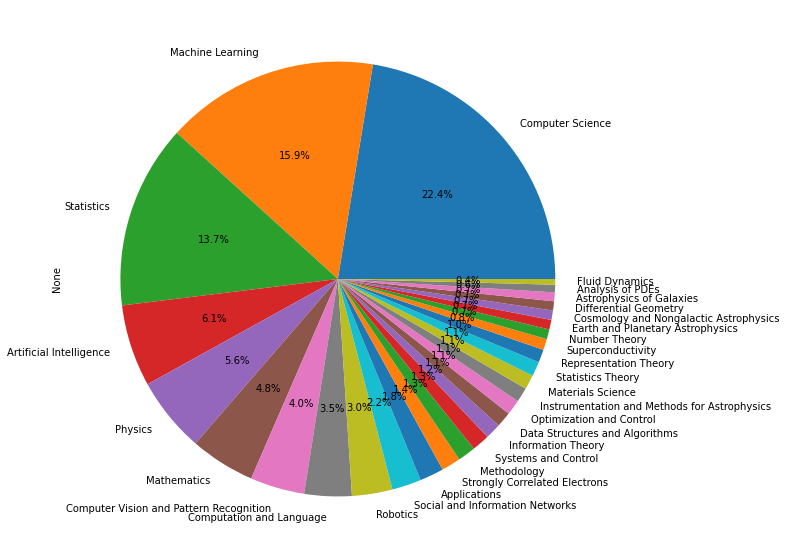

In [12]:
EDAtopic(0, topic_vec, df)

Topic 2: phase, spin, temperature, field, transition, state, energy, quantum, states, order


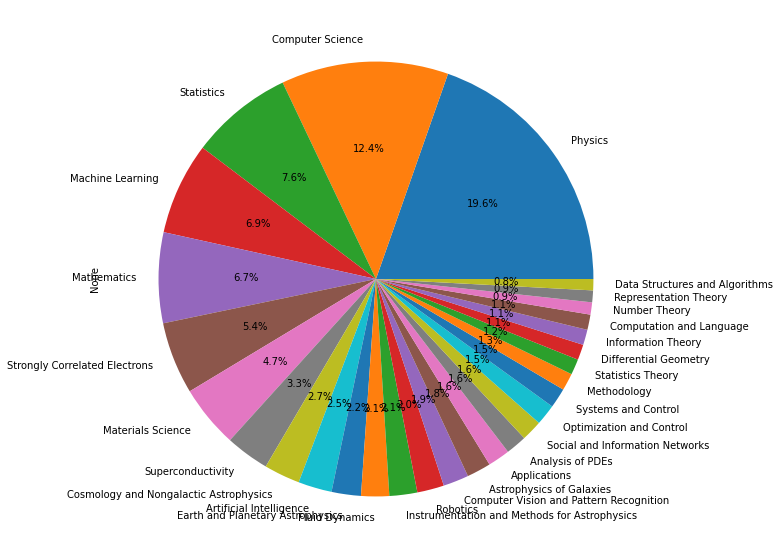

In [13]:
EDAtopic(1, topic_vec, df)

Topic 3: problem, algorithm, optimization, problems, algorithms, convergence, convex, solution, complexity, functions


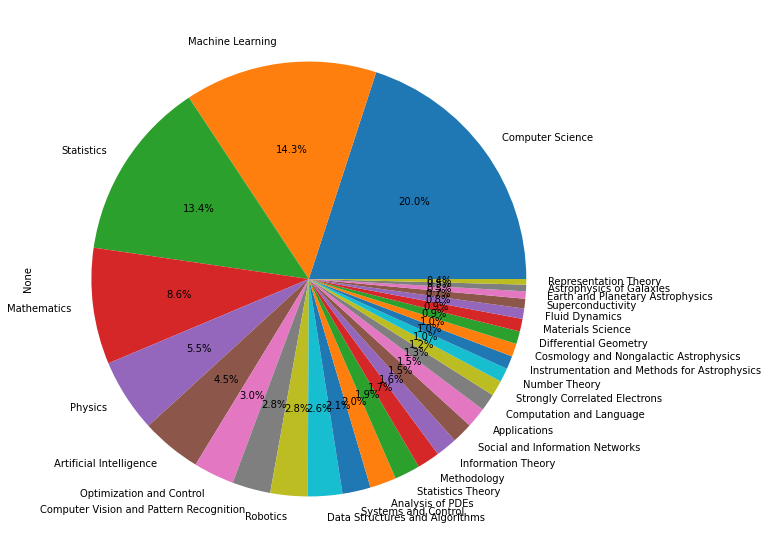

In [15]:
EDAtopic(2, topic_vec, df)

Topic 4: galaxies, mass, star, gas, formation, galaxy, stars, emission, observations, cluster


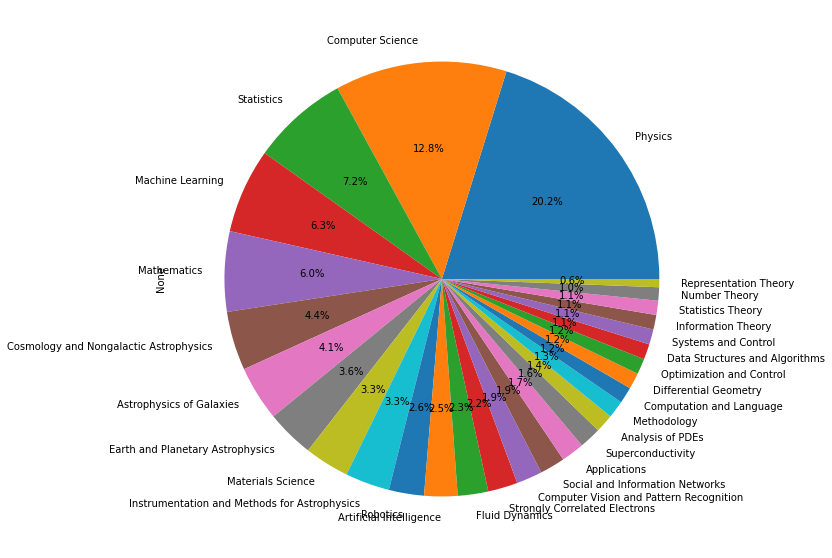

In [16]:
EDAtopic(3, topic_vec, df)

Topic 5: network, networks, nodes, layer, layers, architecture, structure, training, node, networks networks


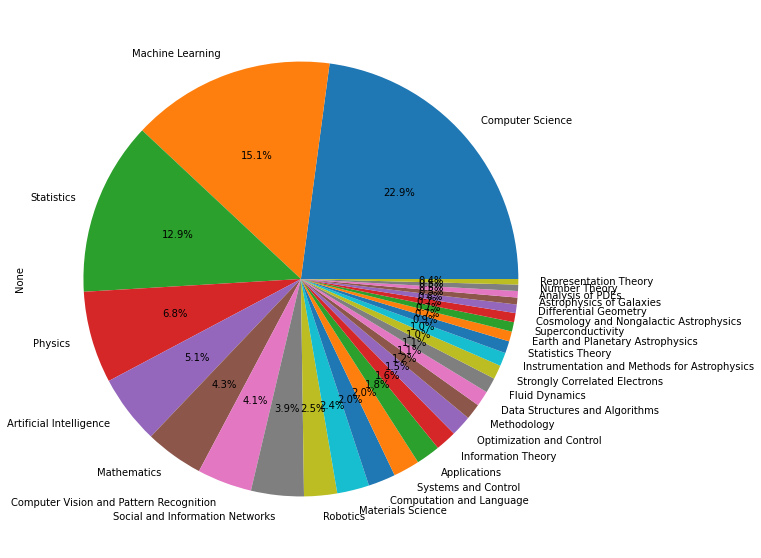

In [17]:
EDAtopic(4, topic_vec, df)

Topic 6: control, systems, controller, design, power, dynamics, feedback, stability, paper, controllers


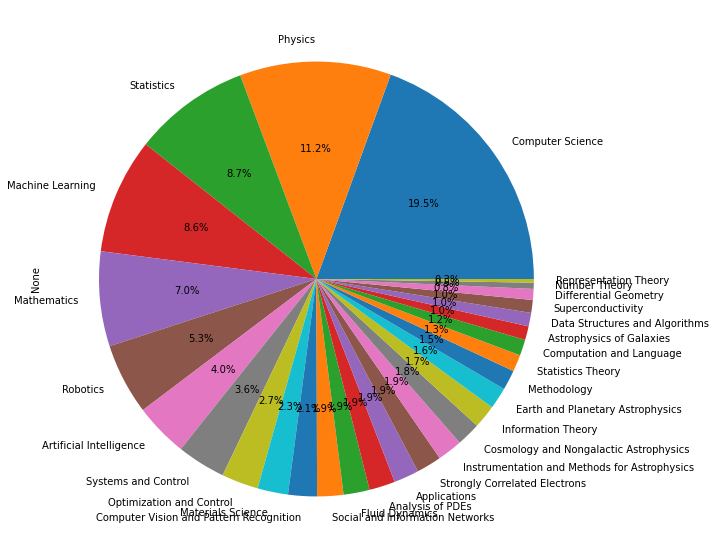

In [18]:
EDAtopic(5, topic_vec, df)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
def get_recommends_user(userID, U, num_recom):
    userrecs = []
    rec_likes = []
    cosmat = cosine_similarity(W)
    comp_user = [np.argsort(cosmat[:,userID])[i] for i in range(-2,-2-num_recom,-1)]
    print("User selected abstract #%s is most similar to abstract #%s "% (userID, comp_user))
    rec_likes = U.iloc[comp_user,:]
    current = U.iloc[userID]
    return rec_likes,comp_user

In [21]:
def printuserscore(ii,W,df,topic_vec):
    print(df['ABSTRACT'].iloc[ii])
    print()
    user = W.iloc[ii].sort_values(ascending = False)
    topic_sort = [int(i) for i in user[user>0].index.tolist()]
    if len(topic_sort) > 3:
        topic_sort = topic_sort[0:3]
    for i in range(len(topic_sort)):
        print('Topic:',topic_vec[topic_sort[i]-1])
        print('Score:',user[i])
        print()

In [22]:
def recommdationsystem(user_to_rec,num_recom,W,df,topic_vec):
    item, recomd = get_recommends_user(user_to_rec,W,num_recom)
    print()
    print('User selected abstract info:\n')
    printuserscore(user_to_rec,W,df,topic_vec)
    for i in range(num_recom):
        print('No. %s Recommended abstract:\n' % (i+1))
        print(recomd[i])
        printuserscore(recomd[i],W,df,topic_vec)

In [23]:
user_to_rec = 12
num_recom = 5
recommdationsystem(user_to_rec,num_recom,W,df,topic_vec)

User selected abstract #12 is most similar to abstract #[984, 11322, 1446, 2193, 2714] 

User selected abstract info:

we show that an embedding inside euclidean space based on tropical geometry generates stable sufficient statistics considering barcodes. inside topological data analysis, barcodes are multiscale summaries of algebraic topological characteristics that capture a `shape' of data; however, inside practice, they have complex structures which make them difficult to use inside statistical settings. a sufficiency result presented inside this work allows considering classical probability distributions to be assumed on a tropical geometric representation of barcodes. this makes the variety of parametric statistical inference methods amenable to barcodes, all while maintaining their initial interpretations. more specifically, we show that exponential family distributions may be assumed, and that likelihood functions considering persistent homology may be constructed. we conceptua

In [26]:
user_to_rec = 430
num_recom = 2
recommdationsystem(user_to_rec,num_recom,W,df,topic_vec)

User selected abstract #430 is most similar to abstract #[7582, 725] 

User selected abstract info:

we present near infrared high-precision photometry considering eight transiting hot jupiters observed during their predicted secondary eclipses. our observations were carried out with the help of a staring mode of a wircam instrument on a canada-france-hawaii telescope (cfht). we present a observing strategies and data reduction methods which delivered time series photometry with statistical photometric precisionas low as 0.11%. we performed the bayesian analysis to model a eclipse parameters and systematics simultaneously. a measured planet-to-star flux ratios allowed us to constrain a thermal emission from a day side of these hot jupiters, as we derived a planet brightness temperatures. our results combined with previously observed eclipses reveal an excess inside a brightness temperatures relative to a blackbody prediction considering a equilibrium temperatures of a planets consideri

In [27]:
user_to_rec = 2
num_recom = 2
recommdationsystem(user_to_rec,num_recom,W,df,topic_vec)

User selected abstract #2 is most similar to abstract #[10034, 11017] 

User selected abstract info:

nanostructures with open shell transition metal or molecular constituents host often strong electronic correlations and are highly sensitive to atomistic material details. this tutorial review discusses method developments and applications of theoretical approaches considering a realistic description of a electronic and magnetic properties of nanostructures with correlated electrons. first, a implementation of the flexible interface between density functional theory and the variant of dynamical mean field theory (dmft) highly suitable considering a simulation of complex correlated structures was explained and illustrated. on a dmft side, this interface was largely based on recent developments of quantum monte carlo and exact diagonalization techniques allowing considering efficient descriptions of general four fermion coulomb interactions, reduced symmetries and spin-orbit coupling, wh